# Lab 09 Prelab - Exponentials and Uncertainty in Count Rates

In [1]:
%reset -f
import data_entry2
import numpy as np
import matplotlib.pyplot as plt

Lab 09, radiation shielding, will use physical models that are exponential. The process of *Linearizing* exponential data allows us to continue to use our linear fitting techniques on data that were originally not linear. This prelab uses worked examples to teach you about the linearization process and subsequent analysis. Additionally, we will discuss how to quantify uncertainty in radiation count-rates.

Some notes before we dive into the pre-lab proper:
1. Most questions in this pre-lab ask you to explain why you can perform a certain step. The explanations do not need to be mathematically rigorous. What we want is a level of detail in your explanation so that a confused peer in the course could read it and understand the “why” part. For example, you might explain a step in an algebraic manipulation of a function as “the function looks like $y=mx+b$ and we know how to fit a graph to this function.”
1. For the first two parts of the pre-lab, we omit uncertainties from the examples to focus attention on working with exponential data. However, in the lab you will be using data that includes uncertainties.

## Part 1 - Exponentials

The table and plot below display the population $P$ of yeast cells observed in a sample of grape juice being fermented into wine, measured over a time $t$. For simplicity, we have neglected the uncertainties in the data and rounded all times to the nearest minute.

In [2]:
# Run me to load the first example data set
# Make sure to hit "Generate Vectors"!

de = data_entry2.sheet("lab09_prelab_data1.csv")

Sheet name: lab09_prelab_data1.csv


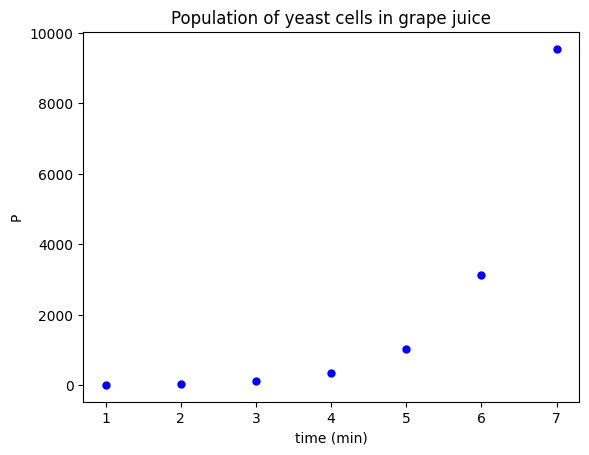

In [3]:
# Run me to plot the above data

plt.plot(tVec, PVec, "bo", markersize=5)
plt.title("Population of yeast cells in grape juice")
plt.xlabel("time (min)")
plt.ylabel("P")
plt.show()

The data are rising with a steep upward curvature, rising extremely fast at later times $t$, so we suspect that $P$ may be rising EXPONENTIALLY with $t$. To check for an exponential dependence, $P(t) \propto e^{at}$ (where $\propto$ means "proportional to"), we plot a *semi-log* graph, in which the log of the population is plotted on the y-axis. In order to obtain the natural log of the population $P$, we use the `np.log()` function.

A small aside; you might be used to denoting the natural logarithm (base-$e$ logarithm) as $\ln$ in high school (and with $\log$ denoting the base-10 logarithm). However, in physics and math and most computer languages, the standard notation is to use $\log$ to denote the natural logarithm (and with the base-10 logarithm being denoted as $\log_{10})$.

In [4]:
# Run me to take the (natural) log of PVec

logPVec = np.log(PVec)

Plotting the semi-log graph, we then obtain:

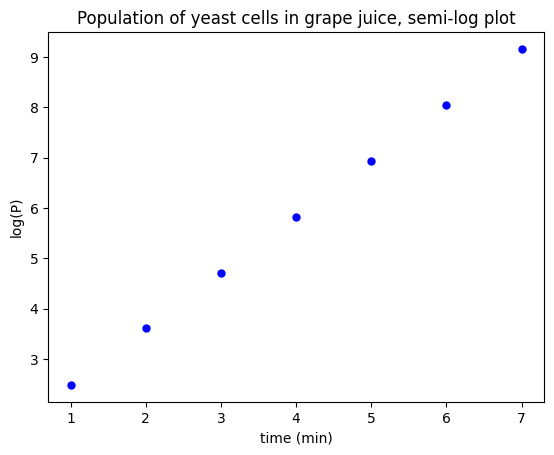

In [5]:
# Run me to make the semi-log (log[P] vs t) graph

plt.plot(tVec, logPVec, "bo", markersize=5)
plt.title("Population of yeast cells in grape juice, semi-log plot")
plt.xlabel("time (min)")
plt.ylabel("log(P)")
plt.show()

The graph reveals that a plausibly linear relationship between $\log(P)$ and $t$. It looks like the following general equation should be a good model for the data:

$$\log(P) = mt + b$$

### Your turn #1.1

Explain why we can write this equation as the model for the data.

Since the relationship between log(P) and t are linear, we write the equation as the model for this data

##### Answer (Uncollapse to reveal)

We can write this equation as the model for the data because the graph shows a linear relationship between $\log(P)$ and $t$, with a nonzero intercept.

### Your turn #1.2

Estimate the slope of the line by choosing two points from the graph and calculating it. 

In [41]:
estimate = (9.5-1)/(7-1)
estimate

1.4166666666666667

##### Answer

Choosing the points of (2 min, 3.6) and (6 min, 8.0) by eyeballing the graph, we approximate the slope as:

$$m = \frac{8.0 - 3.6}{6\text{ min} - 2\text{ min}} = 1.1\text{ min}^{-1}.$$

### Your turn #1.3

Explain why we assign the units of 1/minutes to the slope.

We use inverse of minutes because of log(P).

##### Answer

The units of the slope will be the units of the y-variable divided by the units of the x-variable (as slope is rise over run). Since $\log(P)$ is dimensionless and the units of time in the data are minutes, the units of the slope come out to be inverse minutes.

### Your turn #1.4

The value of the intercept $b$ is approximately 1.4. Briefly explain how you would find this value.

 mt     + b = log(P)
 
 1.1(6) + b = 8
 
          b = 8 - 6.6
          
          b = 1.4

##### Answer

Knowing the slope is $m = 1.1\text{ min}^{-1}$, we can substitute a known point into the equation $\log(P) = mt + b$ to approximate what $b$ should be. As an example, using (6 min, 8.0) as an (approximate) point, we find:

$$8.0 = 1.1 \times 6 + b \implies b = 8 - 6.6 = 1.4$$
 

### Connecting the Linear and Exponential Equations

Now, let's connect our linear expression of $\log(P) = mt + b$, with the exponential equation $P_0\,e^{at}$.

Some logarithmic and mathematical rules that may be of use are given below:

- Rule 1 - Inverse properties: $\log_a(a^x) = x$ and $a^{\log_a(x)} = x$
- Rule 2 - Product: $\log_a(xy) = \log_a(x) + \log_a(y)$ and $e^{x+y} = e^x e^y$
- Rule 3 - Quotient: $\log_a(x/y) = \log_a(x) - \log_a(y)$ and $e^{x-y} = e^x/e^y$
- Rule 4 - Power: $\log_a(x^p) = p\log_a(x)$
- Rule 5 - Property of equalities: If you perform the same option on both sides of an equation, the sides remain equal to each other.    

### Your turn #1.5

For the following steps, indicate which rule was applied.

*Start:* $\log(P) = mt + b$

*Step 1:* $e^{\log(P)} = e^{mt + b}$.

Property of Equalities

*Step 2:* $P = e^{mt + b}$

Inverse Property

*Step 3:* $P = e^b e^{mt}$

Product

##### Answer

1. Property of equalities
2. Inverse property
3. Product Rule

##### 
We have two expressions for $P$: $P = P_0 e^{at}$ as well as $P=e^b e^{mt}$. We find that the slope $m$ is the coefficient of $t$ inside the exponential: $m = a$ and the prefactor $P_0$ is the exponential of the intercept: $P_0 = e^b$.

### Your turn #1.6

If we substitute in the values for $m$ and $b$, the model becomes:

$$P = 4.0e^{1.1 t}.$$

This is called exponential behavior (which is of the form $e^{t}$ and differs from a power law, which would be of the form $t^\alpha$). Explain how the coefficient 4.0 in front of the exponential was determined.

because $e^{1.4} = 4$

##### Answer

The coefficient is equal to $e^b$. We found that $b = 1.4$, and we therefore can calculate $e^{1.4} \sim 4.0$.

### Summary

To summarize, data that follow a straight line on a *semi-log* plot (logarithmic y-axis, linear x-axis) indicate that an exponential is the correct model, and the value of the slope gives the coefficient in the argument of the exponent. 

A customary way to write such exponentials is:

$$P(t) = P(0)e^{t/\tau}$$

so that the parameter $\tau$ has the same units as the variable $t$. In this example, the units are minutes and $\tau$ is referred to as a time constant (like we saw in the RC lab). For this particular set of data,

$$\tau = 0.9\text{ minutes}.$$


In python, we can obtain the logarithm of a vector by using the `np.log()` function on the original vector. In conclusion, we remark on the power of linearization; it allows us to see if a dataset has exponential behavior, and allows us to determine the coefficient in the exponent via determining the slope of the linearized dataset (something we know how to do); figuring out the coefficient just by looking at the original data is less obvious.

### Your turn #1.7

Explain the relationship between the time constant and the slope of the line in the semi-log plot.

The inverse of the slope is the time constant

##### Answer

The time constant is the inverse of the slope of the semi-log plot.

## Part 2 - Uncertainties in radiation count-rates

In this lab we will be using a Geiger counter to detect radiation from a radioactive source. Specifically, we will be using an Iron 55 source, which low-energy gamma rays when it decays. The Geiger counter detects ionizing radiation, including the low-energy gamma rays from this decay. Each particle of ionization radiation that interacts with the Geiger counter will produce a “count”. There are many factors that influence how many counts will be recorded by the Geiger counter, including how long you count for, how active the source is, how far apart the source and counter are, and how much shielding is in between source and counter.

The count-rate, $R$, is the quantity that represents the rate at which the counts are being measured,

$$R = N/t$$

where $t$ is the amount of time for which you counted and $N$ the number of counts observed.

Radioactive decay is a random process, so as with the pendulum timing measurements, there will be variability when you run multiple trials. The randomness in this case is well-described by counting statistics (specifically by the Poisson distribution). These counting statistics tell us that the uncertainty in the number of counts N is given by:

$$u\_N = \sqrt{N}.$$

This means that if you make repeated measurements of $N$ over the same time interval $T$, but keep the other variables the same, that these measurements will follow a Gaussian distribution and have a standard deviation of $\sqrt{N}$. 

Now, let's turn our attention to calculating the uncertainty in the count-rate $R$. We can write the relative uncertainty for $R$ as:

$$\frac{u\_R}{R} = \sqrt{\left(\frac{u\_N}{N}\right)^2 + \left(\frac{u\_t}{t}\right)^2}. \quad (1)$$

### Your turn #2.1

Revisit the <a href = "https://docs.google.com/document/d/e/2PACX-1vTIsUtk7j6RnqhzD3hqYvxvvBEp20Ya3mCCQTi4ypSbqFB3CdKdIsDCitk541WsFADbQ5Feh0MsUKBz/pub" target = "_blank">Overview of Uncertainty Propagation</a> document. Which expression for uncertainty propagation was used here?

$$\frac{u[z]}{z} = \sqrt{\left(\frac{u[x]}{x}\right)^2 + \left(\frac{u[y]}{y}\right)^2}$$

##### Answer

We used the expression for propogating the uncertainty when we multiply/divide two quantities. If $z = x/y$, then:

$$\frac{u\_z}{z} = \sqrt{\left(\frac{u\_x}{x}\right)^2 + \left(\frac{u\_y}{y}\right)^2}$$

i.e. we add the relative uncertainties in quadrature.

### Your turn #2.2

Using our expression for $u\_N$ from the last question ($u\_N/N = \sqrt{N}/N = 1/\sqrt{N}$), we can rewrite the expression above as:

$$\frac{u\_R}{R} = \sqrt{\left(\frac{1}{\sqrt{N}}\right)^2 + \left(\frac{u\_t}{t}\right)^2}. \quad (2)$$
$$\frac{u\_R}{R} = \sqrt{\frac{1}{N} + \left(\frac{u\_t}{t}\right)^2}. \quad (3)$$

Show how you get from equation (1) to equation (3).

For 2 to 3,  $(1/\sqrt{N})^2 = 1/N$ so the experessions goes from $$\frac{u\_R}{R} = \sqrt{\left(\frac{1}{\sqrt{N}}\right)^2 + \left(\frac{u\_t}{t}\right)^2}. \quad (2)$$ to $$\frac{u\_R}{R} = \sqrt{\frac{1}{N} + \left(\frac{u\_t}{t}\right)^2}. \quad (3)$$

For 1 to 2, we know $\frac{u\_N}{N} = \frac{\sqrt{N}}{N} = \frac{1}{\sqrt{N}}$

##### Answer

Going from (1) to (2), we use that $u\_N/N = \sqrt{N}/N = 1/\sqrt{N}$. Going from (2) to (3), we use that $(1/\sqrt{N})^2 = 1/N$.

### Focusing on the counting statistics uncertainty

In a later part of the prelab we will look at the uncertainty in time, but for now let us focus our attention only on the uncertainty due to counting statistics. To do this we will use a simplified version of Equation 3, without the uncertainty in time,

$$\frac{u\_R}{R} = \frac{1}{\sqrt{N}}. \quad (4)$$

Let's use this to look at how counting for a longer period of time will affect the uncertainty in our count rate.

### Example 2.1

You perform a counting experiment and measure $N = 400$ counts during a 49.98s time interval. We will investigate how to determine the timing uncertainty during the lab.

### Your turn #2.3

Calculate the relative uncertainties for this measurement: $u\_N/N$, and $u\_R/R$.

$\frac{1}{\sqrt{N}} = \frac{1}{\sqrt{400}} = 0.05$ and $\frac{u\_N}{N}= 0.05$.

##### Answer

$u\_N/N = 1/\sqrt{N} = 1/\sqrt{400} = 1/20 = 0.05$ and $u\_R/R = u\_N/N = 0.05$.

### Your turn #2.4

Show that $R = 8.00 \pm 0.40$ counts/second (after we apply our regular 2 sig figs for calculated uncertainties rule).

The info we have: 
- $R = N/t = 400/49.98 = 8.0032$ counts/second
- $u\_R/R = 0.05$ so $u\_R = 0.05 \times R \approx 0.40$

Answer: 
We have $R = 8.00 \pm 0.40$ counts/second

##### Answer

$R = N/t = 400/49.98 = 8.0032$ counts/second, and we know that $u\_R/R = 0.05$ so $u\_R = 0.05 \times R \approx 0.40$. Therefore by the 2 sig fig reporting rule we have $R = 8.00 \pm 0.40$ counts/second. 

### Example 2.2

You decide that you can reduce the uncertainty in your count-rate by counting for longer and decide to count for 4 times as long. You measure $N = 1602$ counts in a 200.16s time interval. 

### Your turn #2.5

Again, calculate the relative uncertainties for this measurement: $u\_N/N$, and $u\_R/R$.

$\frac{1}{\sqrt{N}} = \frac{1}{\sqrt{1602}}= 0.025$ and $\frac{u\_R}{R} = 0.025$.

##### Answer

$u\_N/N = 1/\sqrt{N} = 1/\sqrt{1602} \approx 0.025$ and $u\_R/R = u\_N/N = 0.025$.

### Your turn #2.6

Show that $R = 8.00 \pm 0.20$ counts/second (after we apply our regular 2 sig figs for calculated uncertainties rule).

The info we have: 
- $R = N/t = 1602/200.16 = 8.0036$ counts/second
- $u\_R = 0.025$ so $u\_R = 0.025 \times R \approx 0.20$

Answer: 
We have $R = 8.00 \pm 0.20$ counts/second

##### Answer

$R = N/t = 1602/200.16 = 8.0036$ counts/second, and we know that $u\_R/R = 0.025$ so $u\_R = 0.025 \times R \approx 0.20$. Therefore by the 2 sig fig reporting rule we have $R = 8.00 \pm 0.20$ counts/second. 

### Your turn #2.7

Use the relative uncertainty $u\_N/N$ to explain how this happened.

The uncertainty in the count rate is halfed since $N$ increased by a factor of 4, $u\_N/N $ decreased by a factor of $1/2$.

##### Answer

Since $N$ increased by a factor of 4, $u\_N/N = 1/\sqrt{N}$ decreased by a factor of $1/\sqrt{4} = 1/2$, hence the uncertainty in the count rate is half of what it was in the first example.

## Part 3 - Setting up analysis code for the lab

In the lab, we will be analyzing the radiation count-rate $R$ as a function of the thickness of shielding $x$. You have two options for doing the analysis this week.
- Option 1: Manual adjustment of fitting parameter to minimize chi-squared. This is a bit quicker to set up, but will take more effort during the lab to iteratively adjust parameters to find the best fit.
- Option 2: The two-parameter analytic solution to minimize chi-squared. This will be much quicker in the lab if you get it set up ahead of time. 

Below, we have a mock dataset for which we will demonstrate the process of linearization - you'll need this for either approach.

**These data represent how the radiation count rate, $N/t$, changes as a function of the thickness of shielding, $x$, placed between the radiation source and the radiation detector.**

In [6]:
# Run me to load the second example data set
# Make sure to hit "Generate Vectors"!

de2 = data_entry2.sheet("lab09_prelab_data2.csv")

Sheet name: lab09_prelab_data2.csv


The uncertainty $u\_N$ can be calculated by taking the square root of the $N$-vector:

In [43]:
# Run me to calculate the u\_N vector

uNVec = np.sqrt(NVec)

Next, we want to calculate the count rate from the data. We recall that $R = N/t$, so we can calculate the count rate vector as:

In [44]:
# Run me to calculate the R = N/t vector

RateVec = NVec/tVec

Next, rearranging equation (3) from the earlier part in the pre-lab, we can obtain the uncertainty in the count rates:

$$u\_R = R\sqrt{\frac{1}{N} + \left(\frac{u\_t}{t}\right)^2}.$$

So in python, this becomes:

In [45]:
# Run me to calculate the u\_R vector

uRateVec = RateVec * np.sqrt(1/NVec + (utVec/tVec)**2)

Our model for the count-rate will take the form:

$$R(x) = R_0\exp(-\mu x)$$

where $R_0 = R(0)$ is the no-shielding count-rate, and $\mu$ is the attenuation parameter. In order to proceed with fitting for the count-rate, we will want to linearize the data; in order to do so, we take the natural logarithm of the count-rate. Doing so, we obtain:

$$\log(R(x)) = \log(R_0\exp(-\mu x)) = \log(R_0) + \log(\exp(-\mu x)) = \log(R_0) - \mu x = b+ mx$$

where in the last equality we have $m = -\mu$ as the slope of the linearized model and $\log(R_0) = b$ as the intercept.

To fit this model, we will want to take the natural logarithm of the count rate data. Doing so in python, we have:

In [46]:
# Run me to calculate the natural logarithm of the count rate data

logRateVec = np.log(RateVec)

We will also want to obtain the uncertainty in the logarithm of the rate; we can derive this using the derivative rule for uncertainties:

$$u\_f(x) = u\_x\left|  {\frac{\mathrm{d}f}{\mathrm{d}x}} \right|$$

In our case, we have that the function $f(x)$ takes the form of $log(R)$, so the uncertainty is:

$$u\_\log(R) = u\_R\left| \frac{\mathrm{d}\log(R)}{\mathrm{d}R}\right| = u\_R\frac{1}{R} = \frac{u\_R}{R}$$

where we have used that the derivative of the natural logarithm $\log(R)$ is $\frac{1}{R}$. We have therefore found the uncertainty in the logarithm of the rate to be $u\_R/R$. Writing this another way: if $Y = \log(R)$ then $u\_Y = u\_R/R$. This may well seem strange compared to the other uncertainties we've calculated (if it doesn't, look at it more carefully!). Let's also calculate this in python:

In [47]:
# Run me to calculate the uncertainty in the natural logarithm of the count rate data

ulogRateVec = uRateVec/RateVec

Now, we have a linearized dataset to which we may fit a linear model (with an intercept). This is something that we have done many times before (in labs 5-8). We can reuse all of the code we had for plotting the (linearized data) scatterplot, plotting the linear model, calculating and plotting the residuals, and calculating the $\chi_w^2$ metric for calculating the goodness of fit.

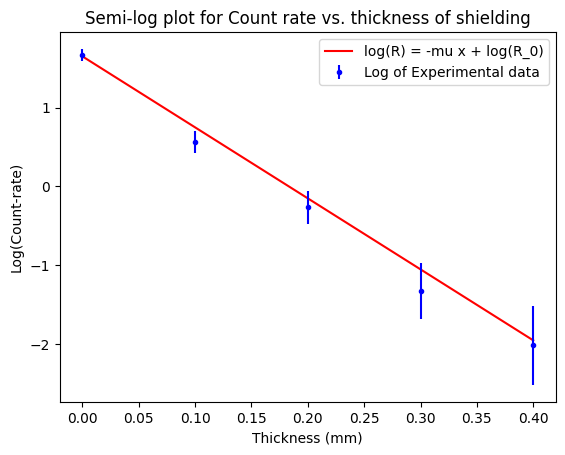

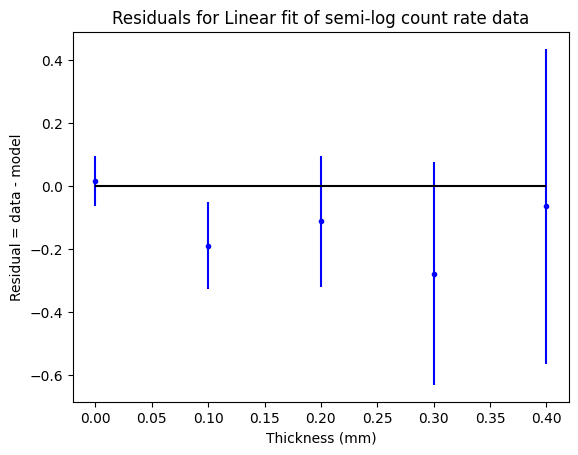

Chi-squared: 0.944998220097936


In [48]:
# Run me to create an initial model and associated plots
# 

# DATA/MODEL PLOT

# Step 1: find the limits of the data:
xmin = np.min(xVec) # use the np.min function to find the smallest x value
xmax = np.max(xVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

# Step 3: calculate the linear model values
#################### MODIFY THE MODEL PARAMETERS HERE #########################
slope = -9  # Estimate of the slope m
intercept = 1.65  # Estimate of the intercept b
###############################################################################
ypoints = xpoints * slope + intercept # this calculates the yvalues at all 200 points

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "log(R) = -mu x + log(R_0)")

# What's below is exactly what we had earlier:
plt.errorbar(xVec, logRateVec, ulogRateVec, fmt="bo", markersize=3, label="Log of Experimental data")
plt.title("Semi-log plot for Count rate vs. thickness of shielding")
plt.xlabel("N (Sheets)")
plt.ylabel("Log(Count-rate)")
plt.legend()
plt.show()


# RESIDUALS PLOT
# Step 1: Calculate the model at each x-datapoint
ymodel = xVec * slope + intercept

# Step 2: Calculate the residual vector
resVec = logRateVec - ymodel

# Step 3: Plot the residual vector against the x-data vector
plt.errorbar(xVec, resVec, ulogRateVec, fmt="bo", markersize = 3)

# Step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Add axis labels and title, and show the graph
plt.title("Residuals for Linear fit of semi-log count rate data")
plt.xlabel("N (Sheets)")
plt.ylabel("Residual = data - model")
plt.show()


# CHI-SQUARED CALCULATION
N = len(xVec)
P = 2  # 2 parameters; slope and intercept
weightedsquaredresVec = (resVec/ulogRateVec)**2
chisquared = np.sum(weightedsquaredresVec)/(N-P)
print("Chi-squared:", chisquared)

A couple notes:
- We do all of the fitting on the <u>linearized dataset</u>. Thus, for plotting, the residuals calculation, and the $\chi_w^2$ calculation, we use the <u>logarithm of the experimental count data</u> throughout.
- The count-rate decreases the more shielding we have; so the exponential coefficient, and hence the slope of the semi-log plot will be both negative.

### Your turn #3.1 (manual fit)

The semi-log plot looks linear, which tells us that the data indeed possesses exponential behavior. However, the linear model we fit to the semi-log scatter plot looks like a pretty bad fit at the moment. 

Find a best fit model for the data above using iterative method of the manual, iterative method of adjusting the `slope` and `intercept` values manually, using chi-squared as feedback for when you have found the best fit. As always, use your residuals to guide the fitting process. Report the best-fit slope and intercept parameters, as well as the minimized $\chi_w^2$ value you end up with.

**Your best-fit values**
* slope = -9
* intercept = 1.65
* chi-squared = 0.944998220097936

### Your turn #3.2

From your best-fit `slope` and `intercept` values, extract the parameters $R_0$ (the zero-shielding count-rate) and $\mu$ (the attenuation coefficient). Recall that $b = \log(R_0)$ and $m = -\mu$.

$R_0 = e^b = e^1.65 \approx 5.2  \text{ counts/second}$ and $m = - (-9) = 9 \text{ mm}^{-1}$  

##### Answer (Consistency check for final values)

You should have found that $\mu \approx 9.5 \text{ mm}^{-1}$ and $R_0 \approx 5 \text{ counts/second}$. The physical interpretation for $R_0$ is that it is what the model predicts the count-rate will be when there is no shielding.

## Part 4 - Setting up analysis code for the lab (Analytic 2-parameter best fit)

In the RC circuit lab, we used an *analytic* expression for the best-fit slope that minimized $\chi_w^2$. In that scenario, we had a slightly simpler model of $y = mx$; without any intercept parameter. Calculating the best fit for the two-parameter model follows a similar strategy as the one-parameter case, but results in somewhat more complicated expressions, so here we will just quote the result. 

We consider a dataset with $N$ data points: $x_i$, $y_i \pm u\_y_i$ and first define some intermediate parameters to simplify the coding:

$$A = \sum_{i=1}^N \frac{1}{(u\_y_i)^2}$$

$$B = \sum_{i=1}^N \frac{x_iy_i}{(u\_y_i)^2}$$

$$C = \sum_{i=1}^N \frac{x_i}{(u\_y_i)^2}$$

$$D = \sum_{i=1}^N \frac{y_i}{(u\_y_i)^2}$$

$$E = \sum_{i=1}^N \frac{x_i^2}{(u\_y_i)^2}$$

$$Z = A\times E - C^2$$

Having defined these sums, we can then quote the best-fit parameters and their uncertainties as:


$$m = \frac{A\times B - C \times D}{Z}$$

$$u\_m = \sqrt{\frac{A}{Z}}$$

$$b = \frac{D\times E - B\times C}{Z}$$

$$u\_b = \sqrt{\frac{E}{Z}}$$

It is not important in this course to understand how we arrived at these complicated expressions, but they can be derived using the same process of differentiating the chi-squared equation and setting that to 0 that we used for the 1-parameter model. 


##### Your turn #4.1

Below, we have some of the python code that calculates the best-fit slope/intercept $m$ and $b$, along with their uncertainties, for a dataset `xVec, yVec, uyVec` (running the code will just throw an error, as we have not defined these quantities). Finish the missing steps to calculate `m`, `b`, `um` and `ub`.

_**Hint**_: You could change yVec to logRateVec and uyVec to ulogRateVec, but it might be easier to leave the calculations of A, B, C, etc. alone, and instead set `yVec = logRateVec` and `uyVec = ulogRateVec` before those values are calculated. You also need to implement the final calculations for m, b, u[m] and u[b]

In [49]:
# Fix the expressions in this cell to use our data from above and to
# correcty calculate m, u[m], b and u[b]
yVec = logRateVec
uyVec = ulogRateVec

A = np.sum(1/uyVec**2)
B = np.sum(xVec*yVec/uyVec**2)
C = np.sum(xVec/uyVec**2)
D = np.sum(yVec/uyVec**2)
E = np.sum(xVec**2/uyVec**2)
Z = A * E - C**2

m  = ((A*B)-(C*D))/Z
um = np.sqrt(A / Z)
b  = ((D*E)-(B*C))/Z
ub = np.sqrt(E/Z)

print("Slope =", m, "±",um)
print("Intervept =", b, "±",ub)

Slope = -9.773022532930717 ± 0.7026503571290137
Intervept = 1.6418967188100062 ± 0.07497794771938894


### Your turn #4.2

Use your best-fit slope and intercept values from above in your code below to make your best-fit model, resulting plots, and  $\chi_w^2$. Use the residuals graph and chi-squared to assess the quality of the fit of this model to these data.

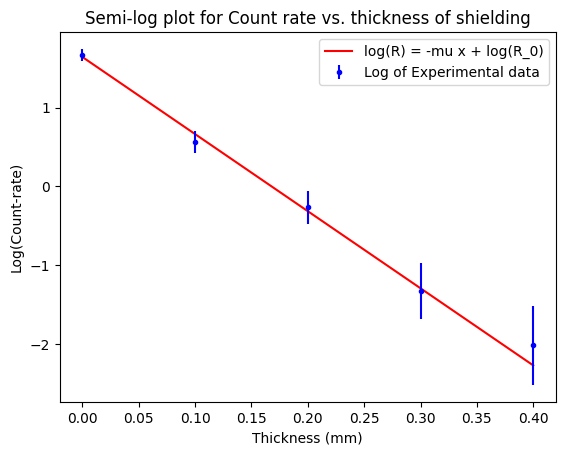

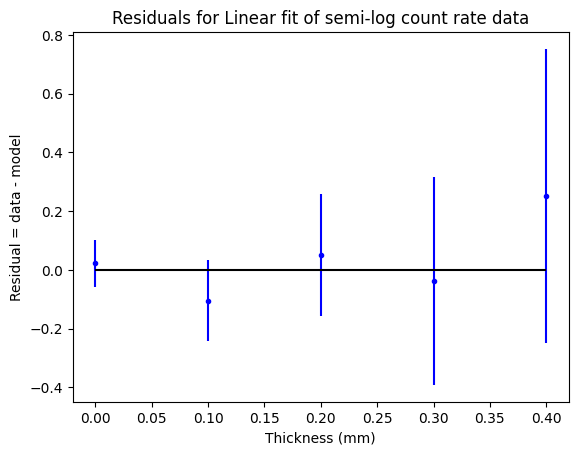

Chi-squared 0.32431343681817987


In [50]:
# DATA/MODEL PLOT
# Step 1: find the limits of the data:
xmin = np.min(xVec) # use the np.min function to find the smallest x value
xmax = np.max(xVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

# Step 3: calculate the model values (for linear model with intercept):
#################### MODIFY THE MODEL PARAMETERS #########################
slope = -9.773022532930717  # Replace ?? with the best fit slope
intercept = 1.6418967188100062  # Replace ?? with the best fit intercept
##########################################################################
ypoints = xpoints * slope + intercept # this calculates the yvalues at all 200 points

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "log(R) = -mu x + log(R_0)")

# What's below is exactly what we had earlier:
plt.errorbar(xVec, logRateVec, ulogRateVec, fmt="bo", markersize=3, label="Log of Experimental data")
plt.title("Semi-log plot for Count rate vs. thickness of shielding")
plt.xlabel("Thickness (mm)")
plt.ylabel("Log(Count-rate)")
plt.legend()
plt.show()


# RESIDUALS PLOT
# Step 1: Calculate the model at each x-datapoint
ymodel = xVec * slope + intercept

# Step 2: Calculate the residual vector
resVec = logRateVec - ymodel

# Step 3: Plot the residual vector against the x-data vector
plt.errorbar(xVec, resVec, ulogRateVec, fmt="bo", markersize = 3)

# Step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Add axis labels and title, and show the graph
plt.title("Residuals for Linear fit of semi-log count rate data")
plt.xlabel("Thickness (mm)")
plt.ylabel("Residual = data - model")
plt.show()


# CHI-SQUARED CALCULATION
N = len(xVec)
P = 2  # 2 parameters; slope and intercept
weightedsquaredresVec = (resVec/ulogRateVec)**2
chisquared = np.sum(weightedsquaredresVec)/(N-P)
print("Chi-squared", chisquared)

### Your turn #4.3

From the best-fit $m$ and $b$ values, extract the parameters $R_0$ (the zero-shielding count-rate) and $\mu$ (the attenuation coefficient). Recall that $b = \log(R_0)$ and $m = -\mu$.

$b = e^1.6418967188100062 \approx 5.17$ and $m = -(-9.773022532930717) \approx 9.80$

### Your turn #4.4

From the uncertainties in $m$ and $b$, extract the uncertainties in $R_0$ and the attenuation coefficient $\mu$.

Hint: By the derivative rule, we have that:

$$R_0 = \exp(b) \implies u\_R_0 = u\_b\exp(b)$$

$$m = -\mu \implies u\_m = u\_\mu.$$

$\mu = 9.80 \pm 0.70 \text{ mm}^{-1}$ and $R_0 = 5.17 \pm 0.39 \text{ counts/second}$.

##### Answer (Consistency check for final values)

You should have found that $\mu = 9.80 \pm 0.70 \text{ mm}^{-1}$ and $R_0 = 5.17 \pm 0.39 \text{ counts/second}$.

# Submit

Steps for submission:

1. Click: Run => Run_All_Cells
2. Read through the notebook to ensure all the cells executed correctly and without error.
3. File => Save_and_Export_Notebook_As->HTML
4. Inspect your html file
5. Upload the HTML document to the lab submission assignment on Canvas.